In [20]:
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import glob as glob

In [18]:
class my_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc')>0.999:
            print('\n Reached 99.9 % of accuracy so canceling training')
            self.model.stop_training = True
    
callbacks = my_Callback()

In [36]:
import os

happy_img = glob.glob('happy/*.png')
sad_img = glob.glob('sad/*.png')
#print(len(happy_dir_list), len(sad_dir_list))

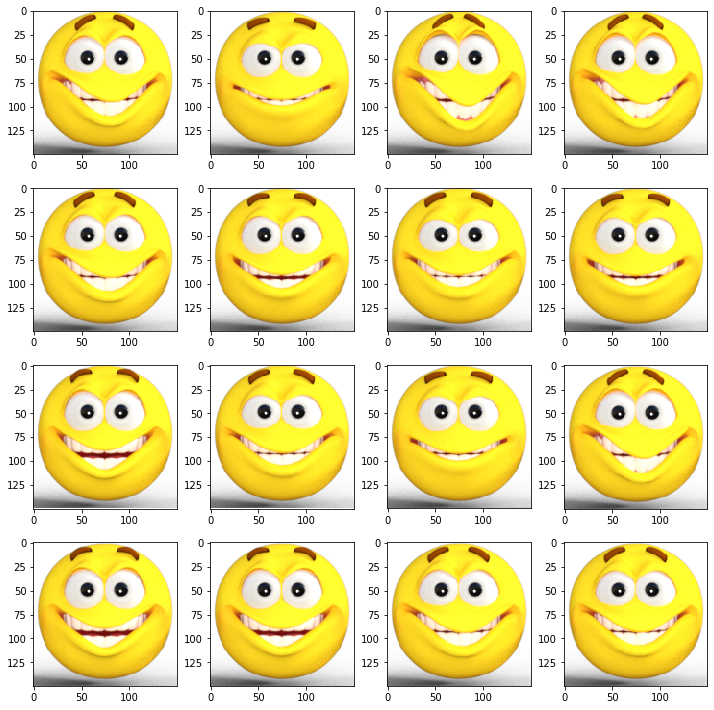

In [39]:
from random import randint
plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(mpimg.imread(happy_img[randint(0, len(happy_img) - 1)]))
plt.tight_layout()

In [40]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), 
                                                           activation = 'relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D((2, 2)),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [41]:
from keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [42]:
from keras.preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_data_generator.flow_from_directory(zip_file_address[0:-17] + '/h-or-s/',
                                                           target_size = (150, 150),
                                                          batch_size = 10, 
                                                           class_mode = 'binary',)

                                                          # save_to_dir= zip_file_address[0:-17] + '/images/', 
                                                          # save_prefix='aug_shifted', 
                                                          # save_format='png'
                                                          # )

Found 80 images belonging to 2 classes.


In [43]:
model.fit_generator(train_generator, steps_per_epoch=20, epochs = 30, verbose=1, callbacks=[callbacks])

Epoch 1/30
20/20 [==============================] - 4s 193ms/step - loss: 0.7916 - acc: 0.5150
Epoch 2/30
20/20 [==============================] - 3s 144ms/step - loss: 0.2826 - acc: 0.8800
Epoch 3/30
20/20 [==============================] - 3s 151ms/step - loss: 0.1619 - acc: 0.9450
Epoch 4/30
20/20 [==============================] - 3s 161ms/step - loss: 0.0719 - acc: 0.9800
Epoch 5/30
20/20 [==============================] - 3s 152ms/step - loss: 0.0259 - acc: 0.9900
Epoch 6/30
19/20 [===========================>..] - ETA: 0s - loss: 0.0138 - acc: 1.0000
 Reached 99.9 % of accuracy so canceling training
20/20 [==============================] - 3s 153ms/step - loss: 0.0132 - acc: 1.0000


In [55]:
model.predict(test_img_arr_expand_vstack)

array([[1.]], dtype=float32)

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]


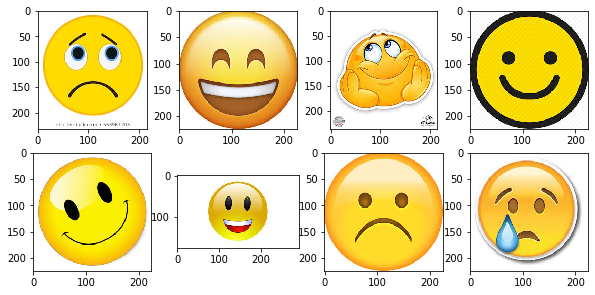

In [53]:
from keras.preprocessing import image
import glob

test_imgs = glob.glob('test_happy_or_sad/*.jpg')

plt.figure(figsize = (10, 10))
for img, i in zip(test_imgs, range(len(test_imgs))):
    plt.subplot(4, 4, i + 1)

    
    plt.imshow(mpimg.imread(img))

    test_img = image.load_img(img, target_size = (150, 150))
    test_img_array = image.img_to_array(test_img)
    test_img_arr_expand = np.expand_dims(test_img_array, axis = 0)
    test_img_arr_expand_vstack = np.vstack([test_img_arr_expand])
    classes = model.predict(test_img_arr_expand_vstack, batch_size=2)

    if classes[0][0] == 1.0:
        plt.title('Happy :)')
    else:
        plt.title('Sad :(')
        
plt.tight_layout()
classes

In [54]:
# Not finished yet